<a href="https://colab.research.google.com/github/venkatagollapalli28-netizen/codsoft-/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 Dataset Shape: (150, 4)

📊 First 5 Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

🔢 Target Classes: [np.str_('setosa') np.str_('versicolor') np.str_('virginica')]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


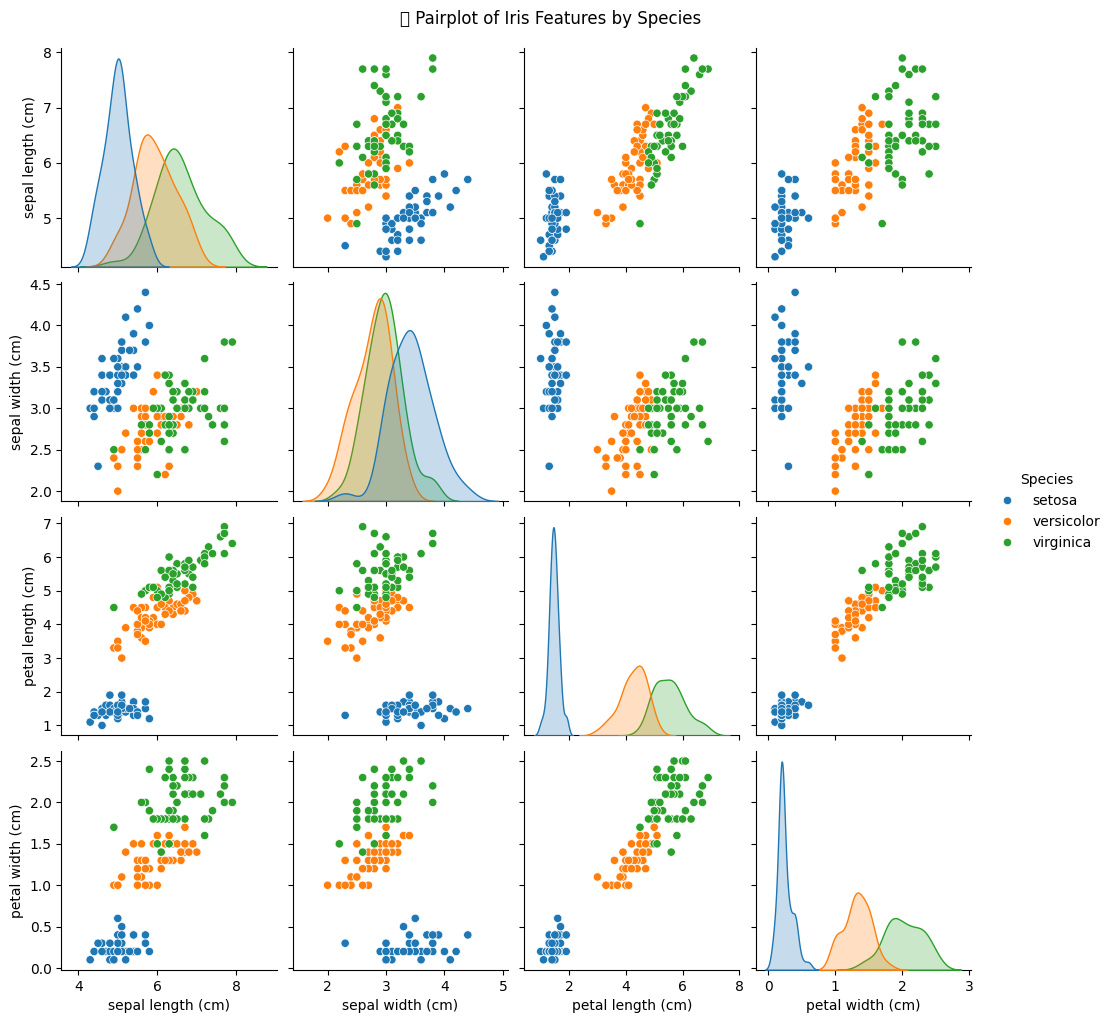


🚀 Training: Logistic Regression
✅ Accuracy: 0.9333
📌 Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
📄 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


🚀 Training: K-Nearest Neighbors
✅ Accuracy: 0.9333
📌 Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
📄 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# IRIS FLOWER CLASSIFICATION - FULL PROJECT

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Load Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Map numerical labels to species names
species_map = dict(zip(range(3), iris.target_names))
y_named = y.map(species_map)

# Step 3: Data Overview
print("🔍 Dataset Shape:", X.shape)
print("\n📊 First 5 Rows:")
print(X.head())
print("\n🔢 Target Classes:", y_named.unique())

# Step 4: Data Visualization
sns.pairplot(pd.concat([X, y_named.rename("Species")], axis=1), hue='Species')
plt.suptitle("🔎 Pairplot of Iris Features by Species", y=1.02)
plt.show()

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_named, test_size=0.2, random_state=42, stratify=y_named)

# Step 6: Feature Scaling (required for SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Model Training
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🚀 Training: {name}")

    # Use scaled data for models that require it
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Evaluation
    print(f"✅ Accuracy: {acc:.4f}")
    print("📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Find Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")

# Step 9: Predict on a New Sample
sample = np.array([[5.8, 2.7, 4.1, 1.0]])  # Example new flower data

if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
    sample_scaled = scaler.transform(sample)
    prediction = best_model.predict(sample_scaled)
else:
    prediction = best_model.predict(sample)

print("\n🌼 Predicted Species for sample", sample, "=>", prediction[0].capitalize())
